<a href="https://www.kaggle.com/code/vaibhav2851/tesla-stock-price-prediction?scriptVersionId=148045097" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization



In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
from prophet import Prophet


In [4]:
 #Initializing Plotly

## Importing the Dataset & Exploring it

In [5]:
df  = pd.read_csv('/kaggle/input/tesla-stock-price/TSLA (1).csv')

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-29,1.384667,1.392000,1.333333,1.356667,1.356667,9240000
1,2010-07-30,1.346667,1.362667,1.303333,1.329333,1.329333,6403500
2,2010-08-02,1.366667,1.398000,1.355333,1.394667,1.394667,10771500
3,2010-08-03,1.400000,1.463333,1.388000,1.463333,1.463333,18457500
4,2010-08-04,1.463333,1.478667,1.390000,1.417333,1.417333,13695000
...,...,...,...,...,...,...,...
3324,2023-10-12,262.920013,265.410004,256.630005,258.869995,258.869995,111508100
3325,2023-10-13,258.899994,259.600006,250.220001,251.119995,251.119995,102073800
3326,2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
3327,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3329 non-null   object 
 1   Open       3329 non-null   float64
 2   High       3329 non-null   float64
 3   Low        3329 non-null   float64
 4   Close      3329 non-null   float64
 5   Adj Close  3329 non-null   float64
 6   Volume     3329 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.2+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3.329000e+03
mean,68.486023,70.010255,66.849718,68.470939,68.470939,9.659636e+07
std,100.490041,102.758094,98.000266,100.416223,100.416223,8.056308e+07
min,1.186667,1.193333,1.159333,1.173333,1.173333,1.777500e+06
25%,10.850667,11.117333,10.567333,10.857333,10.857333,4.572450e+07
50%,16.835333,17.104000,16.603333,16.844000,16.844000,8.051580e+07
75%,67.456665,68.498665,66.297997,68.336670,68.336670,1.230810e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [9]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [10]:
px.area(df,x='Date',y='Close')

In [11]:
px.line(df,x='Date',y='Close')

In [12]:
px.area(df,x='Date',y='Volume')

In [13]:
# px.bar(df,y='Volume')

In [14]:
px.box(df,y='Close')

# Understanding Facebook Prophet

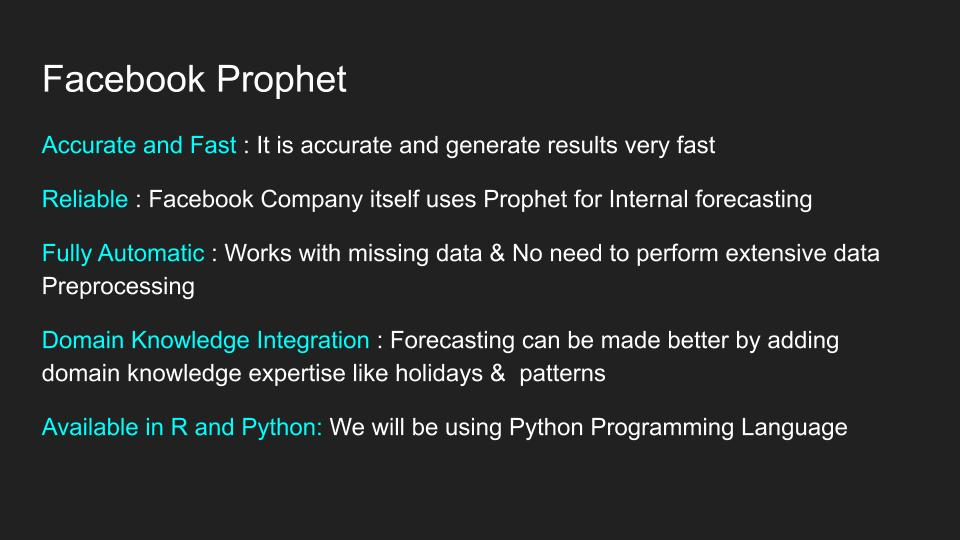

## Data Preperation

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-29,1.384667,1.392000,1.333333,1.356667,1.356667,9240000
1,2010-07-30,1.346667,1.362667,1.303333,1.329333,1.329333,6403500
2,2010-08-02,1.366667,1.398000,1.355333,1.394667,1.394667,10771500
3,2010-08-03,1.400000,1.463333,1.388000,1.463333,1.463333,18457500
4,2010-08-04,1.463333,1.478667,1.390000,1.417333,1.417333,13695000
...,...,...,...,...,...,...,...
3324,2023-10-12,262.920013,265.410004,256.630005,258.869995,258.869995,111508100
3325,2023-10-13,258.899994,259.600006,250.220001,251.119995,251.119995,102073800
3326,2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
3327,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900


In [16]:
columns=['Date','Close']
new_df = pd.DataFrame(df,columns=columns)
new_df

,Date,Close
0,2010-07-29,1.356667
1,2010-07-30,1.329333
2,2010-08-02,1.394667
3,2010-08-03,1.463333
4,2010-08-04,1.417333
...,...,...
3324,2023-10-12,258.869995
3325,2023-10-13,251.119995
3326,2023-10-16,253.919998
3327,2023-10-17,254.850006


In [17]:
profet_df = new_df.rename(columns={'Date':'ds','Close':'y'})
profet_df

,ds,y
0,2010-07-29,1.356667
1,2010-07-30,1.329333
2,2010-08-02,1.394667
3,2010-08-03,1.463333
4,2010-08-04,1.417333
...,...,...
3324,2023-10-12,258.869995
3325,2023-10-13,251.119995
3326,2023-10-16,253.919998
3327,2023-10-17,254.850006


## Creating Facebook Prophet Model

In [18]:
m = Prophet()
m.fit(profet_df)

05:31:58 - cmdstanpy - INFO - Chain [1] start processing
05:32:00 - cmdstanpy - INFO - Chain [1] done processing


##Forecasting

In [19]:
furure_pred = m.make_future_dataframe(periods=30)
forecast = m.predict(furure_pred)

In [20]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-07-29,-1.596075,-33.615155,33.146113,-1.596075,-1.596075,1.009669,1.009669,1.009669,-0.780369,-0.780369,-0.780369,1.790038,1.790038,1.790038,0.0,0.0,0.0,-0.586406
1,2010-07-30,-1.586709,-33.073779,33.262479,-1.586709,-1.586709,0.863535,0.863535,0.863535,-0.997484,-0.997484,-0.997484,1.861019,1.861019,1.861019,0.0,0.0,0.0,-0.723173
2,2010-08-02,-1.558611,-33.645542,32.721244,-1.558611,-1.558611,2.051061,2.051061,2.051061,-0.056677,-0.056677,-0.056677,2.107738,2.107738,2.107738,0.0,0.0,0.0,0.492450
3,2010-08-03,-1.549245,-31.641137,32.347932,-1.549245,-1.549245,1.595847,1.595847,1.595847,-0.602764,-0.602764,-0.602764,2.198611,2.198611,2.198611,0.0,0.0,0.0,0.046602
4,2010-08-04,-1.539879,-32.480895,35.371616,-1.539879,-1.539879,1.767011,1.767011,1.767011,-0.524660,-0.524660,-0.524660,2.291670,2.291670,2.291670,0.0,0.0,0.0,0.227131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,2023-11-13,227.217790,193.914614,259.779596,227.217790,227.217790,2.372868,2.372868,2.372868,-0.056677,-0.056677,-0.056677,2.429545,2.429545,2.429545,0.0,0.0,0.0,229.590658
3355,2023-11-14,227.182378,194.245673,263.660158,227.182378,227.182378,1.770785,1.770785,1.770785,-0.602764,-0.602764,-0.602764,2.373550,2.373550,2.373550,0.0,0.0,0.0,228.953163
3356,2023-11-15,227.146965,194.537467,262.600398,227.146965,227.146965,1.820587,1.820587,1.820587,-0.524660,-0.524660,-0.524660,2.345247,2.345247,2.345247,0.0,0.0,0.0,228.967552
3357,2023-11-16,227.111552,193.844386,260.365327,227.111552,227.111552,1.564992,1.564992,1.564992,-0.780369,-0.780369,-0.780369,2.345361,2.345361,2.345361,0.0,0.0,0.0,228.676544


In [21]:
furure_pred

,ds
0,2010-07-29
1,2010-07-30
2,2010-08-02
3,2010-08-03
4,2010-08-04
...,...
3354,2023-11-13
3355,2023-11-14
3356,2023-11-15
3357,2023-11-16


In [22]:
px.line(forecast,x='ds',y='yhat')

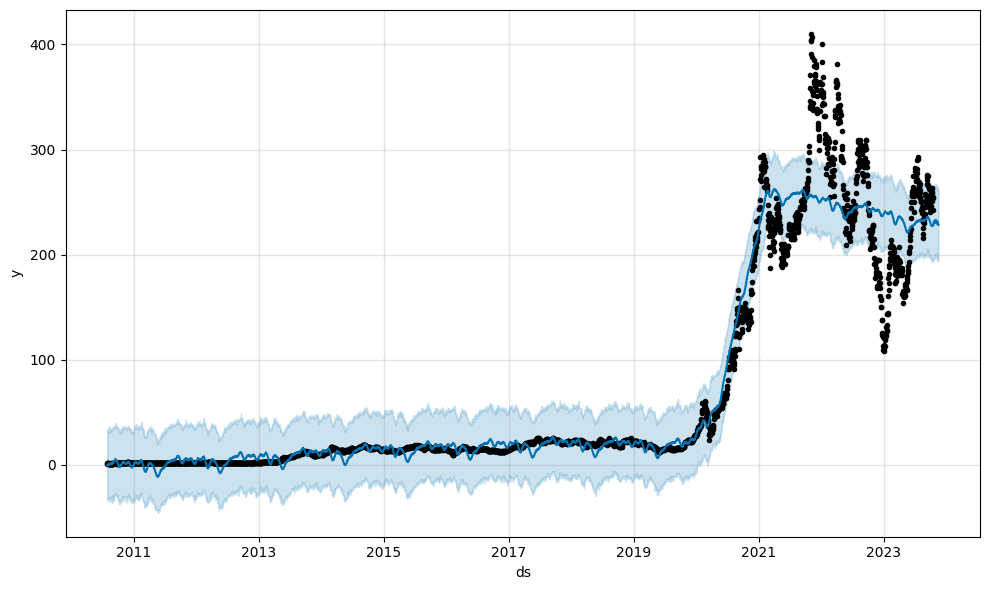

In [23]:
figure = m.plot(forecast,xlabel='ds',ylabel='y')

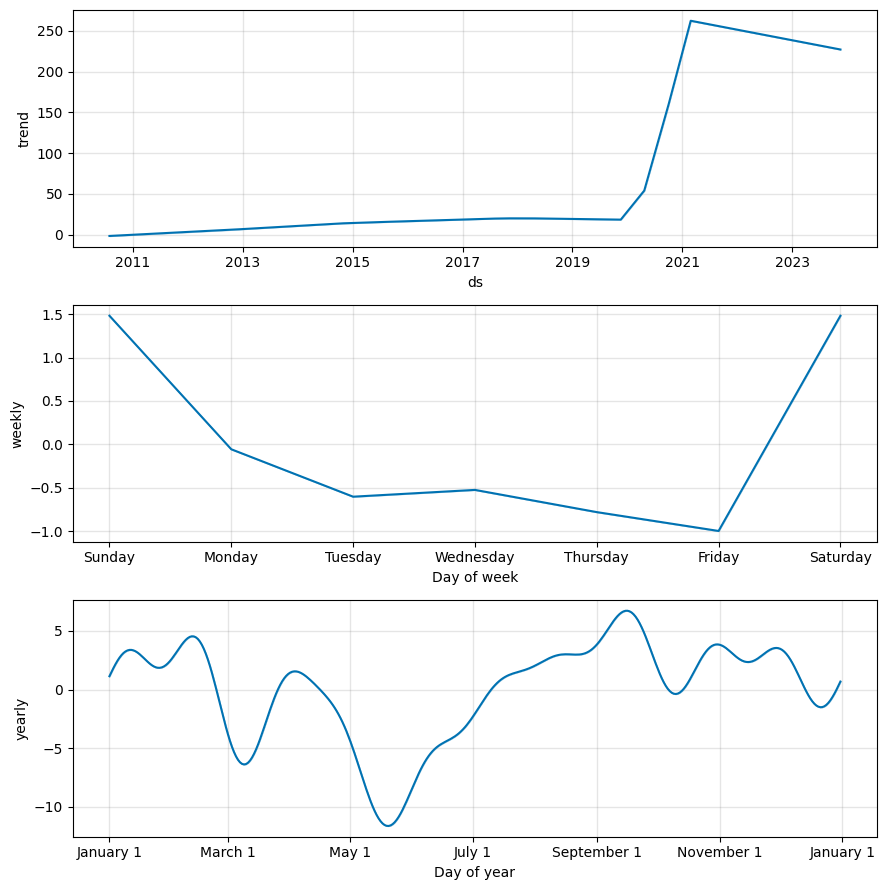

In [24]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [25]:
forecast.to_csv('/kaggle/working/forecast.csv',index=False)

In [26]:
pd.read_csv('/kaggle/working/forecast.csv')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-07-29,-1.596075,-33.615155,33.146113,-1.596075,-1.596075,1.009669,1.009669,1.009669,-0.780369,-0.780369,-0.780369,1.790038,1.790038,1.790038,0.0,0.0,0.0,-0.586406
1,2010-07-30,-1.586709,-33.073779,33.262479,-1.586709,-1.586709,0.863535,0.863535,0.863535,-0.997484,-0.997484,-0.997484,1.861019,1.861019,1.861019,0.0,0.0,0.0,-0.723173
2,2010-08-02,-1.558611,-33.645542,32.721244,-1.558611,-1.558611,2.051061,2.051061,2.051061,-0.056677,-0.056677,-0.056677,2.107738,2.107738,2.107738,0.0,0.0,0.0,0.492450
3,2010-08-03,-1.549245,-31.641137,32.347932,-1.549245,-1.549245,1.595847,1.595847,1.595847,-0.602764,-0.602764,-0.602764,2.198611,2.198611,2.198611,0.0,0.0,0.0,0.046602
4,2010-08-04,-1.539879,-32.480895,35.371616,-1.539879,-1.539879,1.767011,1.767011,1.767011,-0.524660,-0.524660,-0.524660,2.291670,2.291670,2.291670,0.0,0.0,0.0,0.227131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,2023-11-13,227.217790,193.914614,259.779596,227.217790,227.217790,2.372868,2.372868,2.372868,-0.056677,-0.056677,-0.056677,2.429545,2.429545,2.429545,0.0,0.0,0.0,229.590658
3355,2023-11-14,227.182378,194.245673,263.660158,227.182378,227.182378,1.770785,1.770785,1.770785,-0.602764,-0.602764,-0.602764,2.373550,2.373550,2.373550,0.0,0.0,0.0,228.953163
3356,2023-11-15,227.146965,194.537467,262.600398,227.146965,227.146965,1.820587,1.820587,1.820587,-0.524660,-0.524660,-0.524660,2.345247,2.345247,2.345247,0.0,0.0,0.0,228.967552
3357,2023-11-16,227.111552,193.844386,260.365327,227.111552,227.111552,1.564992,1.564992,1.564992,-0.780369,-0.780369,-0.780369,2.345361,2.345361,2.345361,0.0,0.0,0.0,228.676544
